# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.

In [15]:
# insira seu código aqui
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 1. Extração de Região de Interesse (ROI)

Crie uma função chamada crop(). Essa função receberá por parâmetro uma imagem, uma posição x, y e uma altura e largura. A função deverá retornar o pedaço recortado.

Suponha a imagem abaixo, que chamaremos de messiImg.

<img src="https://i.stack.imgur.com/6QscS.jpg"/>

Se sua função for chamada assim:

x_bola = 336
y_bola = 287
largura_bola = 163
altura_bola = 49
ballImg = crop(messiImg, x_bola, y_bola, largura_bola, altura_bola)

Ao final, ballImg deve conter apenas a imagem da bola.

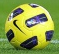


Agora você criará uma função que "cola" uma imagem menor em uma imagem maior.

Crie uma função chamada paste() que receberá, como parâmetro, uma imagem src (source), uma imagem dst (destiny) e uma posição x, y qualquer. Ela retornará a imagem modificada.

A imagem dst será "colada" na posição x, y da imagem src. Confira o exemplo abaixo.

newImg = paste(messiImg, ballImg, x, y)

É assim que ficará a imagem "newImg" (de acordo com a posição x e y)

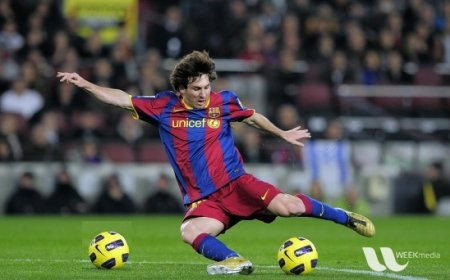

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


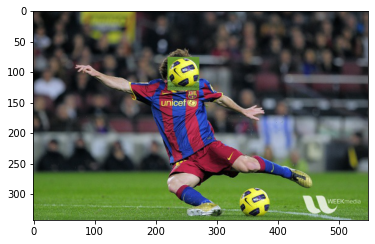

In [17]:
#Insira seu código abaixo!

#função que corta a imagem
def crop (img,x,y,altura,largura):
  imgCorte = img[y:y+altura, x:x+largura]
  return imgCorte

#função que cola duas imagens
def paste (src, dst, x , y):
  imgCola = np.copy(dst)
  alt, larg, c = src.shape
  a = -1
  b = -1
  for i in range(y, y+alt):
    a +=1
    for j in range(x, x+larg):
      b+=1
      imgCola[i,j] = src[a,b]
    b=-1
  return imgCola

obj_img = plt.imread("/content/drive/MyDrive/Images/messi.jpg")
plt.imshow(paste(crop(obj_img, 336,287,163,52), obj_img,220,75))


#2. Trabalhando com Canais de Cores

Crie um algoritmo para saber qual imagem é mais "vermelha", "verde" ou "azul".

Para isso, você deverá pegar uma imagem qualquer e extrair cada um dos canais dela, em separado. Assim, você irá gerar 3 novas imagens, uma contendo apenas o canal vermelho, outra contendo somente o verde e a última, azul.

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/RGB_channels_separation.png"/>

A seguir, você tirará a média de cores da imagem (somar os tons de todos os pixels e dividir pelo total de pixels). Se a imagem do canal vermelho tiver a maior média, então a imagem é mais "vermelha" e assim por diante!

In [20]:
#Insira seu código abaixo!

#carregando a imagem e obtendo suas dimensoes
obj_img = plt.imread("/content/drive/MyDrive/Images/araras_azuis.jpg")
alt, larg, canais = obj_img.shape

#criando imagens de base para cada cor
img_red = np.ones((alt, larg, canais), dtype = "uint8")
img_green = np.ones((alt, larg, canais), dtype = "uint8")
img_blue = np.ones((alt, larg, canais), dtype = "uint8")

#calculando total de pixels e variaveis acumuladoras das tonalidades
total_pixel = alt * larg
soma_blue = 0
soma_red = 0
soma_green = 0

#pegando cada cor e armazenando em sua imagem pixel a pixel
for i in range(0, alt):
  for j in range(0, larg):
    img_red[i,j,0] = obj_img[i,j, 0]
    img_green[i,j,1] = obj_img[i,j, 1]
    img_blue[i,j,2] = obj_img[i,j, 2]
    #armazenando as tonalidades
    soma_blue += img_blue[i, j, 2]
    soma_red += img_red[i, j, 0]
    soma_green += img_green[i, j, 1]

#obtendo a media
soma_blue = soma_blue/total_pixel
soma_red = soma_red/total_pixel
soma_green = soma_green/total_pixel

#informando qual a cor mais expressiva na imagem
if (soma_blue > soma_green and soma_blue > soma_red):
  print("A imagem é mais azul")
elif (soma_green > soma_blue and soma_green > soma_red):
  print("A imagem é mais verde")
else:
  print("A imagem é mais vermelha")

A imagem é mais azul


# 3. Junte pessoas usando Alpha Blending

No vídeo abaixo é feito uma "brincadeira" misturando o rosto de dois políticos brasileiros que antagonizam. A técnica utilizada é de transparência por alpha blending. 

<a href="https://www.youtube.com/watch?v=_NRIjiFnYlM"><img src="https://img.youtube.com/vi/_NRIjiFnYlM/mqdefault.jpg"/></a>

Agora é a sua vez! Pegue duas fotos (se você se sentir a vontade, pode ser uma sua e de um amigo que concorde) e crie uma versão híbrida de vocês.

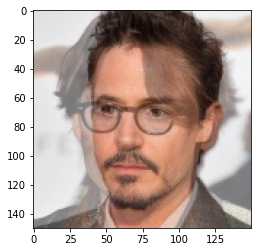

In [21]:
#Insira seu código abaixo
#carregamos as duas imagens
img1 = plt.imread("/content/drive/MyDrive/Images/depp-3.jpg")
img2 = plt.imread("/content/drive/MyDrive/Images/robert.jpg")

#garantir que as fotos do tenham as mesmas
altura, largura, _ = img1.shape
img2_ajustada = cv2.resize(img2, (largura, altura))

#soma ponderada das imagens
img_combinada = cv2.addWeighted(img2_ajustada, 0.5, img1, 0.5, 0)

#reduzir o tamanho da imagem combinada
altura1, largura1, _ = img_combinada.shape
img_combinada = cv2.resize(img_combinada, (int(largura1 * 0.5), int(altura1 * 0.5)))

plt.imshow(img_combinada)


#4. Histograma de Cores

Nos vídeos abaixo, é discutido o tema de histograma de cores em imagens digitais.

<a href="https://www.youtube.com/watch?v=ioa_mFB_nFg"><img src="https://img.youtube.com/vi/ioa_mFB_nFg/mqdefault.jpg"/></a>

<a href="https://www.youtube.com/watch?v=83RZSK1j8Ak"><img src="https://img.youtube.com/vi/83RZSK1j8Ak/mqdefault.jpg"/></a>

Nesse exercício, quero que você selecione 2 imagens distintas entre si. Uma deve ser preto e branco e a outra colorida.

Plote (desenhe o gráfico) dos seus histogramas na tela via Python e OpenCV.

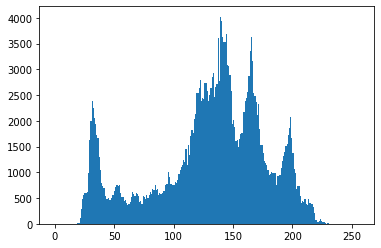

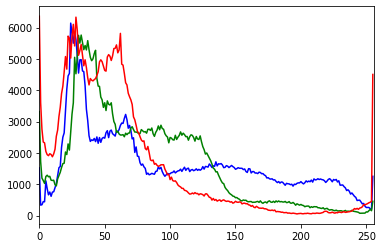

In [22]:
#Insira seu código abaixo

#carregando a imagem preto e branco e exibindo seu histograma com plt.hist
img  = cv2.imread("/content/drive/MyDrive/Images/gato.png")
plt.hist(img.ravel(), 256, [0,256])
plt.show()


#carregando a imagem colorida
img_colorida = cv2.imread("/content/drive/MyDrive/Images/araras_azuis.jpg")
color = ('b', 'g', 'r')

#exibindo em uma mesma imagem os histogramas de azul, verde e vermelho
for i, col in enumerate(color):
  histr = cv2.calcHist([img_colorida], [i], None, [256], [0,256])
  plt.plot(histr, color = col)
  plt.xlim([0, 256])
plt.show()

#5. Adição de Imagens

No vídeo abaixo, é apresentada uma maneira de se fazer adição de imagens (inserir uma imagem menor dentro de uma imagem maior), podendo inclusive combinar esse efeito com a transparência.

<a href="https://www.youtube.com/watch?v=60k962jJAmE"><img src="https://img.youtube.com/vi/60k962jJAmE/mqdefault.jpg"/></a>

Dito isso, faça um algoritmo que receba uma imagem e insira uma marca d'água sobre essa figura. Considere a imagem abaixo como referência.

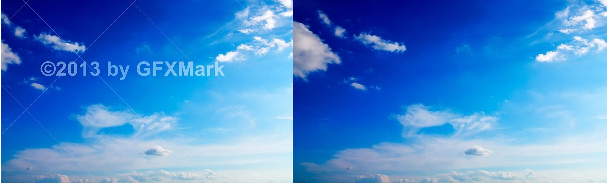

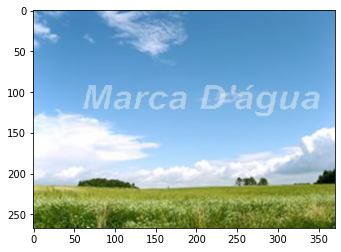

In [23]:
#Insira seu código abaixo

#imagem que cola a marca d'agua sobre um fundo, com a posicao a ser inserida
def addBlendingEffect(fundo, marca, weight, translationForegroundW, translationForegroundH):

    #obtendo o tamanho da marca e separando um pedaco do fundo onde ela sera colocada
    marcaH, marcaF, _ = marca.shape
    crop = fundo[translationForegroundW : marcaH + translationForegroundW, translationForegroundH : marcaF + translationForegroundH]
    
    #obtendo a mascara da marca d'agua
    marcaCinza = cv2.cvtColor(marca, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(marcaCinza, 100, 255, cv2.THRESH_BINARY)

    copyImg = crop.copy()
    altura, largura, = mask.shape

    #colocando pixel a pixel a marca no pedaco de fundo selecionado
    for y in range(0, altura):
        for x in range(0, largura):
            if mask.item(y, x) == 255:
                blendingPixelBlue = crop.item(y, x, 0) * (1.0 - weight) + marca.item(y, x, 0) * weight
                blendingPixelGreen = crop.item(y, x, 1) * (1.0 - weight) + marca.item(y, x, 1) * weight
                blendingPixelRed = crop.item(y, x, 2) * (1.0 - weight) + marca.item(y, x, 2) * weight
                copyImg.itemset((y, x, 0), blendingPixelBlue)
                copyImg.itemset((y, x, 1), blendingPixelGreen)
                copyImg.itemset((y, x, 2), blendingPixelRed)

    #inserindo a marca aplicada a imagem final e a retornando
    imgFinal = fundo.copy()
    imgFinal[translationForegroundW : marcaH + translationForegroundW, translationForegroundH : marcaF + translationForegroundH] = copyImg
    
    return imgFinal

#carregando a imagem de fundo e a marca. Chamando a funcao em seguida, com a opacidade da marca e onde sera posicionada
fundo = cv2.imread("/content/drive/MyDrive/Images/ceu.jpg")
marca = cv2.imread("/content/drive/MyDrive/Images/marca.png")

nova = addBlendingEffect(fundo, marca, 0.4, 80, 50)
nova = cv2.cvtColor(nova, cv2.COLOR_BGR2RGB)
plt.imshow(nova)


#6. Equalização de histograma

Utilizando a ideia dessa página, crie um algoritmo que faça a equalização de histograma da imagem abaixo, a fim de melhorar seu contraste. 

Sugestão: <a href="https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html">siga este tutorial</a>.

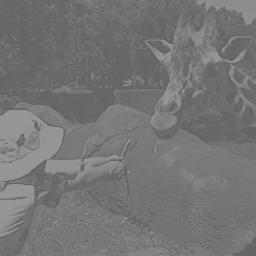

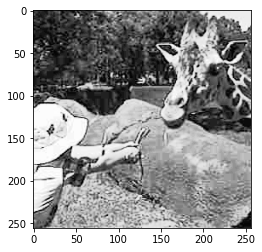

In [24]:
#Insira seu código abaixo

#carregando a imagem, convertendo para cinza, equalizando o histograma e convertendo de volta para rgb
src = cv2.imread("/content/drive/MyDrive/Images/Q6.png")
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
dst = cv2.equalizeHist(src)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

#7. Meu primeiro buscador de imagens!

[Um jeito muito simples de verificar se uma imagem é igual a outra  é por meio de comparação entre histogramas](https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html). 

Dito isso, você deverá fazer o seguinte:

* Crie uma pasta contendo ao menos 5 imagens, das quais duas precisam ser muito similares em seu conteúdo visual (mas não idênticas). Para facilitar, vamos chamar as imagens muito parecidas de S1 e S2. As imagens restantes que são diferentes, serão D1, D2 e D3.
* Faça uma função que receba as imagens S1 e compare ela com S2, D1, D2 e D3 pelo histograma. 
* Compare a distância de S1 para cada imagem considerando as métricas da Correlação, Chi-Square e Bhattacharrya. 
* Para cada imagem, some as três distâncias ao quadrado e aplique a raiz quadrada: sqrt(Corr^2 + Chi-Sq^2 + Bhatta^2)
* Retorne a imagem mais parecida com S1 (o par que tiver a menor distância)

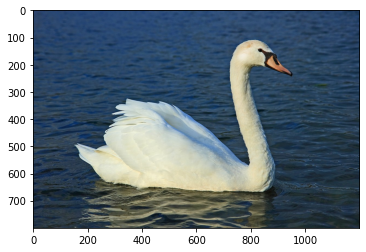

In [25]:
#Insira seu código abaixo

#leitura das imagens
img_S1 = cv2.imread("/content/drive/MyDrive/Images/Questao 7/S1.jpg")
img_S2 = cv2.imread("/content/drive/MyDrive/Images/Questao 7/S2.jpg")
img_D1 = cv2.imread("/content/drive/MyDrive/Images/Questao 7/D1.jpg")
img_D2 = cv2.imread("/content/drive/MyDrive/Images/Questao 7/D2.png")
img_D3 = cv2.imread("/content/drive/MyDrive/Images/Questao 7/D3.png")

#convertendo para HSV
hsv_img_S1 = cv2.cvtColor(img_S1, cv2.COLOR_BGR2HSV)
hsv_img_S2 = cv2.cvtColor(img_S2, cv2.COLOR_BGR2HSV)
hsv_img_D1 = cv2.cvtColor(img_D1, cv2.COLOR_BGR2HSV)
hsv_img_D2 = cv2.cvtColor(img_D2, cv2.COLOR_BGR2HSV)
hsv_img_D3 = cv2.cvtColor(img_D3, cv2.COLOR_BGR2HSV)

hsv_half_down = hsv_img_S1[hsv_img_S1.shape[0]//2:,:]
h_bins = 50
s_bins = 60
histSize = [h_bins, s_bins]
# hue varies from 0 to 179, saturation from 0 to 255
h_ranges = [0, 180]
s_ranges = [0, 256]
ranges = h_ranges + s_ranges # concat lists
# Use the 0-th and 1-st channels
channels = [0, 1]


#calculando os histogramas
hist_half = cv2.calcHist([hsv_half_down], channels, None, histSize, ranges, accumulate=False)
cv2.normalize(hist_half, hist_half, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist_S1 = cv2.calcHist([hsv_img_S1], channels, None, histSize, ranges, accumulate=False)
cv2.normalize(hist_S1, hist_S1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist_S2 = cv2.calcHist([hsv_img_S2], channels, None, histSize, ranges, accumulate=False)
cv2.normalize(hist_S2, hist_S2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist_D1 = cv2.calcHist([hsv_img_D1], channels, None, histSize, ranges, accumulate=False)
cv2.normalize(hist_D1, hist_D1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist_D2 = cv2.calcHist([hsv_img_D2], channels, None, histSize, ranges, accumulate=False)
cv2.normalize(hist_D2, hist_D2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist_D3 = cv2.calcHist([hsv_img_D3], channels, None, histSize, ranges, accumulate=False)
cv2.normalize(hist_D3, hist_D3, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

soma_S1_S2 = 0
soma_S1_D1 = 0
soma_S1_D2 = 0
soma_S1_D3 = 0

#laço aplicando os metodos e guardando a soma ao quadrado
for compare_method in range(4):
  if(compare_method != 3):
    S1_S1 = cv2.compareHist(hist_S1, hist_S1, compare_method)
    S1_half = cv2.compareHist(hist_S1, hist_half, compare_method)
    S1_S2 = cv2.compareHist(hist_S1, hist_S2, compare_method)
    soma_S1_S2 += (S1_S2)*(S1_S2)
    S1_D1 = cv2.compareHist(hist_S1, hist_D1, compare_method)
    soma_S1_D1 += (S1_D1)*(S1_D1)
    S1_D2 = cv2.compareHist(hist_S1, hist_D2, compare_method)
    soma_S1_D2 += (S1_D2)*(S1_D2)
    S1_D3 = cv2.compareHist(hist_S1, hist_D3, compare_method)
    soma_S1_D3 += (S1_D3)*(S1_D3)
  
#fazendo as raizes
soma_S1_S2 = np.sqrt(soma_S1_S2)
soma_S1_D1 = np.sqrt(soma_S1_D1)
soma_S1_D2 = np.sqrt(soma_S1_D2)
soma_S1_D3 = np.sqrt(soma_S1_D3)

#comparando os valores para achar o menor
if (soma_S1_S2 < soma_S1_D1 and soma_S1_S2 < soma_S1_D2 and soma_S1_S2 < soma_S1_D3):
  img = cv2.cvtColor(img_S2, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
elif (soma_S1_D1 < soma_S1_S2 and soma_S1_D1 < soma_S1_D2 and soma_S1_D1 < soma_S1_D3):
  img = cv2.cvtColor(img_D1, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
elif (soma_S1_D2 < soma_S1_S2 and soma_S1_D2 < soma_S1_D1 and soma_S1_D2 < soma_S1_D3):
  img = cv2.cvtColor(img_D2, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
else:
  img = cv2.cvtColor(img_D3, cv2.COLOR_BGR2RGB)
  plt.imshow(img)

#8. Rastreamento (Tracking)

Quando falamos do rastreamento de um objeto, estamos nos referindo a uma aplicação que "acompanha" o movimento de um objeto em um vídeo, marcando a posição dele tipicamente em caixas envolventes. Abaixo tem-se um exemplo:

<img src="https://i.pinimg.com/originals/41/36/f9/4136f909c378936cdf33f2cd975d081c.gif"/>

Nesse exercício, implemente o rastreio de um objeto com uma cor definida, nos moldes do exemplo do vídeo abaixo.

<a href="https://www.youtube.com/watch?v=M2wcIsMXPEA"><img src="https://img.youtube.com/vi/M2wcIsMXPEA/mqdefault.jpg"/></a>

In [ ]:
#Insira seu código abaixo

#carrega o video
cap = cv2.VideoCapture('VideoQ8L.mp4')

for i in range(1, int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    _, frame = cap.read()
    
    hsvFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    #definindo o intervalo de cor que sera detectada (no caso a cor laranja)
    lowerOrange = np.array([10, 127, 0])
    upperOrange = np.array([30, 255, 255])

    mask = cv2.inRange(hsvFrame, lowerOrange, upperOrange)

    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    if(contours):
        i=0

        maxArea = cv2.contourArea(contours[0])
        idContourMaxArea = 0
        for cnt in contours:
            if maxArea < cv2.contourArea(cnt):
                maxArea = cv2.contourArea(cnt)
                idContourMaxArea = i
            i +=1 

        x, y, w, h = cv2.boundingRect(contours[idContourMaxArea])

        if(maxArea > 100.0):
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 3)

        cv2.imshow('frame', frame)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

#9. Limiarização de Imagens

Nos vídeos abaixo, é discutido o tema de limiarização de imagens.

<a href="https://www.youtube.com/watch?v=P2R7Nn1_VwQ"><img src="https://img.youtube.com/vi/P2R7Nn1_VwQ/mqdefault.jpg"/></a>

<a href="https://www.youtube.com/watch?v=onI2lQ0V0pc"><img src="https://img.youtube.com/vi/onI2lQ0V0pc/mqdefault.jpg"/></a>

Nesse exercício, quero que você construa um limiarizador com um trackbar (barra) que permite ajuste dinâmico do limiar. Considere o vídeo abaixo para saber como construir.

<a href="https://www.youtube.com/watch?v=OTiy8knQjJs"><img src="https://img.youtube.com/vi/OTiy8knQjJs/mqdefault.jpg"/></a>

In [ ]:
#Insira seu código abaixo
import time

def onChange(value):
    pass

#imagem carregada e sua cópia
img = cv2.imread("/content/drive/MyDrive/Images/Lenna.png", 0)
copyimg = img.copy()

#cria janela gráfica para inserir a imagem
windowTitle = "Ajuste de Limiar"
cv2.namedWindow(windowTitle)

#cria trackbar
cv2.createTrackbar("Limiar", windowTitle, 255, 255, onChange)


before_limiar = 255
update_limiar = False

counter_time = 0

while True:
    current_limiar = cv2.getTrackbarPos("Limiar", windowTitle)
    
        
    #valor de brilho do trackbar foi alterado pelo usuário
    if before_limiar != current_limiar:
        update_limiar = True
        counter_time = time.time()
        before_limiar = current_limiar

    #se tiver passado 1 segundo desde que o usuário mexeu em algum trackbar
    if time.time() - counter_time > 1:
        #se tiver sido marcado que é pra atualizar contraste ou brilho
        if update_limiar == True:
            limiar, copyimg = cv2.threshold(img, before_limiar, 255, cv2.THRESH_BINARY)
            update_limiar = False
        
    cv2.imshow(windowTitle, copyimg)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cv2.destroyAllWindows()



#10. Filtragem

Considere os seguintes filtros:

*   Filtro da Média
*   Filtro Gaussiano
*   Filtro da Mediana
*   Filtro Sobel
*   Filtro Laplaciano

Crie uma função que receba uma imagem e o nome do filtro. Essa função deve retornar a imagem com o filtro aplicado. 

A seguir, apresente todas as imagens com os filtros aplicados em um grid. Use os subplots conforme apresentados no vídeo abaixo:
<a href="https://www.youtube.com/watch?v=U35qns3LvvI"><img src="https://img.youtube.com/vi/U35qns3LvvI/mqdefault.jpg"/></a>


Referências:
<a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html">Link 1</a> e <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html">Link 2</a>.

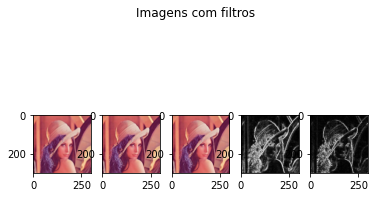

In [26]:
#Insira seu código abaixo

def showMultipleImageGrid(imgsArray, titlesArray, x, y):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1):
        fig, axis = plt.subplots(y)
        fig.suptitle(titlesArray)
        yId = 0
        for img in imgsArray:
            imgMPLIB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axis[yId].imshow(imgMPLIB)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            imgMPLIB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axis[xId].imshow(imgMPLIB)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            imgMPLIB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axis[yId, xId].set_title(titlesArray[titleId])
            axis[yId, xId].imshow(imgMPLIB)
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1

        fig.tight_layout(pad=0.5)
    plt.show()

#função que recebe uma imagem e o nome do filtro e retorna a imagem com o filtro aplicado
def filtro(img, nomeFiltro):
  imgCopy = img.copy();

  if nomeFiltro == "Média" or nomeFiltro == "média":
    imgCopy = cv2.blur(imgCopy, (5,5))
  elif nomeFiltro == "Gaussiano" or nomeFiltro == "gaussiano":
    imgCopy = cv2.GaussianBlur(imgCopy, (5,5), 0)
  elif nomeFiltro == "Mediana" or nomeFiltro == "mediana":
    imgCopy = cv2.medianBlur(imgCopy, 5)
  elif nomeFiltro == "Sobel" or nomeFiltro == "sobel":
    imgCopy = cv2.cvtColor(imgCopy, cv2.COLOR_BGR2GRAY)
    imgCopy = cv2.Sobel(imgCopy, cv2.CV_16S, 1, 0, ksize = 3, scale = 1, delta = 0, borderType = cv2.BORDER_DEFAULT)
    imgCopy2 = cv2.Sobel(imgCopy, cv2.CV_16S, 0, 1, ksize = 3, scale = 1, delta = 0, borderType = cv2.BORDER_DEFAULT)
    abs_grad_x = cv2.convertScaleAbs(imgCopy)
    abs_grad_y = cv2.convertScaleAbs(imgCopy2)
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    imgCopy = grad
  elif nomeFiltro == "Laplaciano" or nomeFiltro == "laplaciano":
    imgCopy = cv2.cvtColor(imgCopy, cv2.COLOR_BGR2GRAY)
    imgCopy = cv2.Laplacian(imgCopy, cv2.CV_16S, ksize=3)
    abs_dst = cv2.convertScaleAbs(imgCopy)
    imgCopy = abs_dst
  else:
    print("Opcao invalida")
    return

  return imgCopy

#Carregando a imagem do drvie
imgTeste = cv2.imread("/content/drive/MyDrive/Images/Lenna.png")
#aplicando filtros diferentes a imagem
imgF1 = filtro(imgTeste, "Média")
imgF2 = filtro(imgTeste, "Gaussiano")
imgF3 = filtro(imgTeste, "Mediana")
imgF4 = filtro(imgTeste, "Sobel")
imgF5 = filtro(imgTeste, "Laplaciano")

imgsArray = [imgF1, imgF2, imgF3, imgF4, imgF5]
title = "Imagens com filtros"

showMultipleImageGrid(imgsArray, title, 5, 1)